# TUGAS MANDIRI 4 MACHINE LEARNING 2 
- NIM: 442023611088
- Nama: Fayshal Karan Athilla
- Prodi: Teknik Informatika / 5
- Kelas: A1

# Import Library

In [9]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import shutil

# Setup Data Folder

In [11]:
import os
import shutil

source_dir = '/kaggle/input/apples-bananas-oranges/original_data_set' 
target_dir = 'fruits_binary'

os.makedirs(os.path.join(target_dir, 'apple'), exist_ok=True)
os.makedirs(os.path.join(target_dir, 'banana'), exist_ok=True)

# Gabungkan fresh + rotten apples ke dalam folder 'apple'
for subfolder in ['freshapples', 'rottenapples']:
    src = os.path.join(source_dir, subfolder)
    for fname in os.listdir(src):
        shutil.copy(os.path.join(src, fname), os.path.join(target_dir, 'apple', fname))

# Gabungkan fresh + rotten bananas ke dalam folder 'banana'
for subfolder in ['freshbanana', 'rottenbanana']:
    src = os.path.join(source_dir, subfolder)
    for fname in os.listdir(src):
        shutil.copy(os.path.join(src, fname), os.path.join(target_dir, 'banana', fname))

# Persiapan Image Generator

In [12]:
IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [14]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 868 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


# Bangun Model Transfer Learning

In [17]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training

In [19]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1748315170.181465     115 service.cc:148] XLA service 0x7d46b0010ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748315170.182504     115 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748315171.024551     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/28 ━━━━━━━━━━━━━━━━━━━━ 4:46 11s/step - accuracy: 0.1250 - loss: 1.2217

I0000 00:00:1748315174.368571     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


28/28 ━━━━━━━━━━━━━━━━━━━━ 32s 798ms/step - accuracy: 0.5244 - loss: 0.7549 - val_accuracy: 0.9907 - val_loss: 0.1214
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 505ms/step - accuracy: 0.9931 - loss: 0.0806 - val_accuracy: 1.0000 - val_loss: 0.0448
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 508ms/step - accuracy: 0.9995 - loss: 0.0348 - val_accuracy: 1.0000 - val_loss: 0.0337
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 500ms/step - accuracy: 0.9977 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 504ms/step - accuracy: 0.9977 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.0182
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 507ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0150
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 510ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 517ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 1.000

# Visualisasi Akurasi & Loss

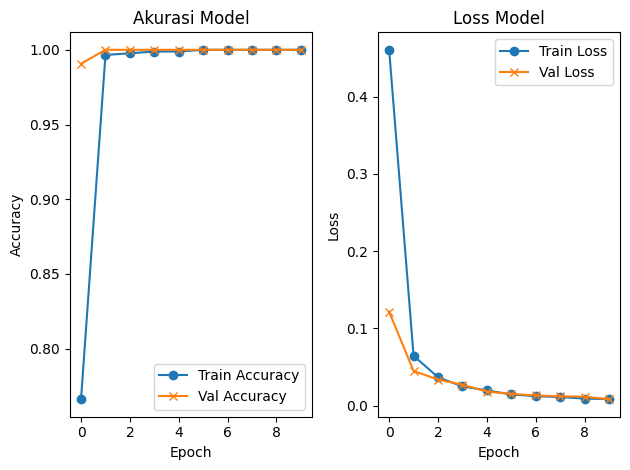

In [20]:
#Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluasi Model

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step


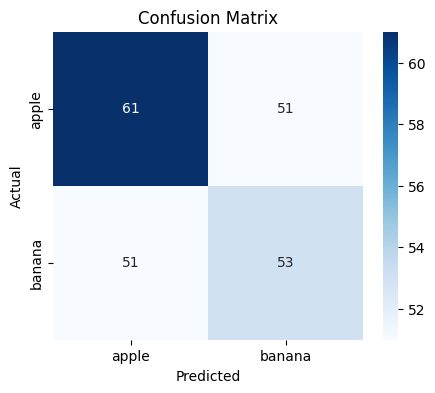

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi di validation set
val_generator.reset()
preds = model.predict(val_generator)
y_pred = (preds > 0.5).astype(int).reshape(-1)
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# SIMPAN MODEL
model.save('model_apel_vs_pisang.h5')